In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df=pd.read_csv('telecom_churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#check size of dataset
df.shape

(7043, 21)

In [4]:
#check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#cross check for null values with data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#check for duplicate data
df.duplicated().sum()

0

In [7]:
#first we drop the customer id column as it is not important for predicting output
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#check for duplicate data after dropping customer id column
df.duplicated().sum() # We donot delete these duplicates, as they were unique with customer id

22

In [9]:
#Total charges columns shows object datatype, so clearly it has some unclean data
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#check for null values in TotalCharges column
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
#we see that a blank space ' ' has 11 data points, so we need to clean it
#first we replace the blank space with null value
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# replace the blank space with null value in Total Cgarges column
df['TotalCharges'].replace(' ',np.nan,inplace=True)
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#check or data type of TotalCharges column
df['TotalCharges'].dtypes

dtype('O')

In [14]:
#Change the data type of the TotalCharges column from object to float
df['TotalCharges']=df['TotalCharges'].astype('float')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#now we replace the null values in TotalCharges column with mean or median of TotalCharges column
df['TotalCharges'].mean(),df['TotalCharges'].median()

(2283.3004408418697, 1397.475)

In [16]:
#we see difference between mean and median of TotalCharges column so we replace the null values with median
m=df['TotalCharges'].median()
df['TotalCharges'].fillna(m,inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

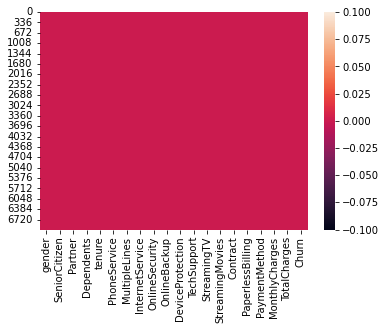

In [17]:
#visualise null values
sb.heatmap(df.isnull())
plt.show()

In [18]:
#check if Data is unbalanced
df['Churn'].value_counts() #Clearly Data is unbalnced , so we balance it after scaling

No     5174
Yes    1869
Name: Churn, dtype: int64

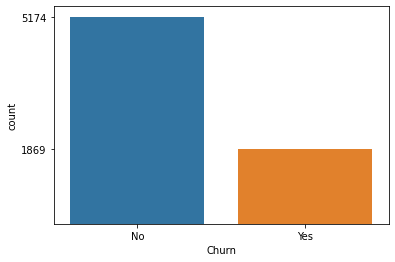

In [19]:
#visualise unbalanced data
f=df['Churn'].value_counts()
sb.countplot(data=df,x='Churn')
plt.yticks(f)
plt.show()

In [20]:
#Seperate the numerical and categorical data
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
df_num=df.select_dtypes(('int64','float64'))
df_cat=df.select_dtypes('object')

In [22]:
#check data types of df_cat and df_num
df_cat.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [23]:
df_num.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [24]:
#Apply LabelRncoder on categorocal type data to convert it into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=df_cat.columns
for col in columns:
    df_cat[col]=le.fit_transform(df_cat[[col]])

In [25]:
#check df_cat 
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [26]:
#Join df_cat and df_num
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65


In [27]:
#select input and output 
X=df_new.drop('Churn',axis=1)
Y=df_new['Churn']

In [28]:
#split the data into 70-30
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
#check shape of X_train,X_test
X_train.shape,X_test.shape

((4930, 19), (2113, 19))

In [30]:
#check shape of Y_train,Y_test
Y_train.shape,Y_test.shape

((4930,), (2113,))

In [31]:
#apply scaling on input columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

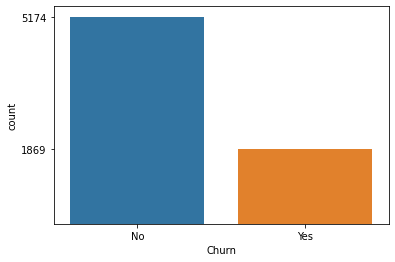

In [32]:
#Now we balance the inbalanced data
f=df['Churn'].value_counts()
sb.countplot(data=df,x='Churn')
plt.yticks(f)
plt.show()

In [33]:
#Use RandomOverSampling technique
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [34]:
#check for data balnacing
X_train1.shape,Y_train1.shape

((7178, 19), (7178,))

In [35]:
#apply random over sampler on testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [36]:
#check for data balnacing
X_test1.shape,Y_test1.shape

((3170, 19), (3170,))

In [37]:
#check for data balnacing
Y_train1.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [38]:
#create user defined function
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print(classification_report(Y_test1,Y_pred))
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [39]:
#import classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
#Train the model with LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1585
           1       0.76      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1157  428]
 [ 265 1320]]


In [41]:
#Train the model with DecisionTreeClassifier algorithm with Gini index 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1585
           1       0.76      0.56      0.65      1585

    accuracy                           0.69      3170
   macro avg       0.71      0.69      0.69      3170
weighted avg       0.71      0.69      0.69      3170

[[1311  274]
 [ 696  889]]


In [42]:
#apply max_depth pruning technique on DecisionTreeClassifier with Gini index
for i in range(1,9):
    dtc_max_depth=DecisionTreeClassifier(max_depth=i,random_state=1)
    print('Max depth :',i)
    dtc_max_depth=create_model(dtc_max_depth)

Max depth : 1
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1585
           1       0.68      0.92      0.78      1585

    accuracy                           0.75      3170
   macro avg       0.78      0.75      0.74      3170
weighted avg       0.78      0.75      0.74      3170

[[ 916  669]
 [ 132 1453]]
Max depth : 2
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1585
           1       0.74      0.74      0.74      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

[[1178  407]
 [ 406 1179]]
Max depth : 3
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1585
           1       0.73      0.81      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.7

In [43]:
#max_depth pruning technique on DecisionTreeClassifier with Gini index
#max depth= 6 gives best recall value =0.82
dtc_max_depth=DecisionTreeClassifier(max_depth=6,random_state=1)
dtc_max_depth=create_model(dtc_max_depth)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1585
           1       0.73      0.83      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1092  493]
 [ 275 1310]]


In [44]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Gini index
for i in range(45,101):
    dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    print('Min_samples_leaf :',i)
    dtc_min_leaf=create_model(dtc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1585
           1       0.75      0.77      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

[[1176  409]
 [ 372 1213]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1585
           1       0.75      0.77      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

[[1171  414]
 [ 369 1216]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1585
           1       0.74      0.77      0.75      1585

    accuracy                           0.75      3170
   macro

In [45]:
#Min samples leaf pruning technique on DecisionTreeClassifier with Gini index
#Min_samples_leaf= 63 gives best recall = 0.81 
dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=63,random_state=1)
dtc_min_leaf=create_model(dtc_min_leaf)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1167  418]
 [ 303 1282]]


In [46]:
#Train the model with DecisionTreeClassifier algorithm with Entropy 
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy')
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1585
           1       0.74      0.52      0.61      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.66      3170
weighted avg       0.69      0.67      0.66      3170

[[1299  286]
 [ 762  823]]


In [47]:
#apply max_depth pruning technique on DecisionTreeClassifier with Entropy
for i in range(1,9):
    dtc2_max_depth=DecisionTreeClassifier(max_depth=i,random_state=1,criterion='entropy')
    print('Max depth :',i)
    dtc2_max_depth=create_model(dtc2_max_depth)

Max depth : 1
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1585
           1       0.68      0.92      0.78      1585

    accuracy                           0.75      3170
   macro avg       0.78      0.75      0.74      3170
weighted avg       0.78      0.75      0.74      3170

[[ 916  669]
 [ 132 1453]]
Max depth : 2
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1585
           1       0.74      0.74      0.74      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

[[1178  407]
 [ 406 1179]]
Max depth : 3
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1585
           1       0.73      0.81      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.7

In [48]:
#max_depth pruning technique on DecisionTreeClassifier with Entropy
#max depth= 5 gives best recall value =0.81
dtc2_max_depth=DecisionTreeClassifier(max_depth=5,random_state=1,criterion='entropy')
dtc2_max_depth=create_model(dtc2_max_depth)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1585
           1       0.77      0.76      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1216  369]
 [ 381 1204]]


In [49]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Entropy
for i in range(45,101):
    dtc2_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1,criterion='entropy')
    print('Min_samples_leaf :',i)
    dtc2_min_leaf=create_model(dtc2_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

[[1150  435]
 [ 310 1275]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1585
           1       0.74      0.81      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

[[1141  444]
 [ 307 1278]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1585
           1       0.74      0.81      0.77      1585

    accuracy                           0.76      3170
   macro

In [50]:
#Min samples leaf pruning technique on DecisionTreeClassifier with Entropy
#Min_samples_leaf=51 gives best recall = 0.80
dtc2_min_leaf=DecisionTreeClassifier(min_samples_leaf=51,random_state=1,criterion='entropy')
dtc2_min_leaf=create_model(dtc2_min_leaf)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.74      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1139  446]
 [ 286 1299]]


In [51]:
#train the model with RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier

In [52]:
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No of decision Trees :',i)
    rfc=create_model(rfc)

No of decision Trees : 10
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1585
           1       0.80      0.58      0.67      1585

    accuracy                           0.72      3170
   macro avg       0.73      0.72      0.71      3170
weighted avg       0.73      0.72      0.71      3170

[[1355  230]
 [ 673  912]]
No of decision Trees : 11
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      1585
           1       0.79      0.63      0.70      1585

    accuracy                           0.73      3170
   macro avg       0.74      0.73      0.73      3170
weighted avg       0.74      0.73      0.73      3170

[[1321  264]
 [ 592  993]]
No of decision Trees : 12
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1585
           1       0.80      0.59      0.68      1585

    accuracy                           0.72      3

In [53]:
#RandomForestClassifier Algorithm
#No of decision Trees=17 gives value of recall 0.63 
rfc=RandomForestClassifier(n_estimators=17,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1585
           1       0.79      0.62      0.69      1585

    accuracy                           0.72      3170
   macro avg       0.74      0.72      0.72      3170
weighted avg       0.74      0.72      0.72      3170

[[1321  264]
 [ 608  977]]


In [54]:
#Apply max_depth pruning on RandomForestClassifier Algorithm
for i in range(1,9):
    rfc_max_depth=RandomForestClassifier(n_estimators=17,random_state=1,max_depth=i)
    print('Max depth :',i)
    rfc_max_depth=create_model(rfc_max_depth)

Max depth : 1
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1585
           1       0.73      0.83      0.78      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

[[1096  489]
 [ 269 1316]]
Max depth : 2
              precision    recall  f1-score   support

           0       0.81      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1143  442]
 [ 260 1325]]
Max depth : 3
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1585
           1       0.75      0.85      0.80      1585

    accuracy                           0.78      3170
   macro avg       0.79      0.7

In [55]:
#max_depth pruning on RandomForestClassifier Algorithm
#Max depth = 3 gives best recall 0.83
rfc_max_depth=RandomForestClassifier(n_estimators=17,random_state=1,max_depth=3)
rfc_max_depth=create_model(rfc_max_depth)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1585
           1       0.75      0.85      0.80      1585

    accuracy                           0.78      3170
   macro avg       0.79      0.78      0.78      3170
weighted avg       0.79      0.78      0.78      3170

[[1136  449]
 [ 240 1345]]


In [56]:
#Apply min_samples_leaf pruning on RandomForestClassifier Algorithm
for i in range(45,101):
    rfc_min_leaf=RandomForestClassifier(n_estimators=17,random_state=1,min_samples_leaf=i)
    print('Min_samples_leaf :',i)
    rfc_min_leaf=create_model(rfc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1585
           1       0.76      0.82      0.79      1585

    accuracy                           0.79      3170
   macro avg       0.79      0.79      0.78      3170
weighted avg       0.79      0.79      0.78      3170

[[1184  401]
 [ 280 1305]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1585
           1       0.76      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1170  415]
 [ 288 1297]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro

In [57]:
#min_samples_leaf pruning on RandomForestClassifier Algorithm
#min_samples_leaf = 52 gives best recall 0.81
rfc_min_leaf=RandomForestClassifier(n_estimators=17,random_state=1,min_samples_leaf=52)
rfc_min_leaf=create_model(rfc_min_leaf)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1585
           1       0.76      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1173  412]
 [ 285 1300]]


In [58]:
#Apply ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [59]:
for i in range(1,20):
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('No of Decision stumps:',i)
    abc=create_model(abc)

No of Decision stumps: 1
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1585
           1       0.68      0.92      0.78      1585

    accuracy                           0.75      3170
   macro avg       0.78      0.75      0.74      3170
weighted avg       0.78      0.75      0.74      3170

[[ 916  669]
 [ 132 1453]]
No of Decision stumps: 2
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1585
           1       0.68      0.92      0.78      1585

    accuracy                           0.75      3170
   macro avg       0.78      0.75      0.74      3170
weighted avg       0.78      0.75      0.74      3170

[[ 916  669]
 [ 132 1453]]
No of Decision stumps: 3
              precision    recall  f1-score   support

           0       0.81      0.71      0.75      1585
           1       0.74      0.83      0.78      1585

    accuracy                           0.77      3170

In [60]:
#ADABoostClassifier
#No of decision stump=6 gives best recall 0.85
abc=AdaBoostClassifier(n_estimators=6,random_state=1)
abc=create_model(abc)

              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1585
           1       0.73      0.87      0.79      1585

    accuracy                           0.77      3170
   macro avg       0.79      0.77      0.77      3170
weighted avg       0.79      0.77      0.77      3170

[[1068  517]
 [ 200 1385]]


In [61]:
#Apply GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    gbc=create_model(gbc)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1585
           1       0.73      0.86      0.79      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

[[1090  495]
 [ 227 1358]]
No of decision tree: 11
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1585
           1       0.74      0.86      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.77      3170
weighted avg       0.78      0.78      0.77      3170

[[1105  480]
 [ 229 1356]]
No of decision tree: 12
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
  

In [63]:
#GradientBoostingClassifier
#Number of Decision Tree=12
gbc=GradientBoostingClassifier(n_estimators=12,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1152  433]
 [ 305 1280]]


In [64]:
#Apply XtremeGradientBoostClassifier
from xgboost import XGBClassifier

In [65]:
for i in range(10,101):
    xgb=XGBClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    xgb=create_model(xgb)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

[[1187  398]
 [ 317 1268]]
No of decision tree: 11
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1191  394]
 [ 316 1269]]
No of decision tree: 12
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
  

In [66]:
#XtremeGradientBoostClassifier
#Number of Decision Tree=12
xgb=XGBClassifier(n_estimators=12,random_state=1)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1193  392]
 [ 315 1270]]


In [67]:
#Apply Support Vector Machine algorithm with hard margin
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.85      0.80      1585

    accuracy                           0.78      3170
   macro avg       0.79      0.78      0.78      3170
weighted avg       0.79      0.78      0.78      3170

[[1142  443]
 [ 244 1341]]


In [68]:
#Apply Support Vector Machine algorithm with soft margin
svc1=LinearSVC(random_state=1,C=0.9)
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.85      0.80      1585

    accuracy                           0.78      3170
   macro avg       0.79      0.78      0.78      3170
weighted avg       0.79      0.78      0.78      3170

[[1142  443]
 [ 244 1341]]


In [69]:
#No improvent in recall score, means data is non linear 
#Apply Support Vector Machine algorithm for non linear data with polynomial kernel function
from sklearn.svm import SVC
poly_svc=SVC(random_state=1,kernel='poly')
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1585
           1       0.74      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1151  434]
 [ 320 1265]]


In [70]:
#Apply Support Vector Machine algorithm for non linear data with radial basis kernel function
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1585
           1       0.75      0.79      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1178  407]
 [ 337 1248]]


In [71]:
#Apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1585
           1       0.69      0.75      0.72      1585

    accuracy                           0.71      3170
   macro avg       0.71      0.71      0.71      3170
weighted avg       0.71      0.71      0.71      3170

[[1053  532]
 [ 390 1195]]


In [72]:
dict={'Algorithm':['Logostic Regression','DTC_G_max','DTC_G_min','DTC_E_max','DTC_G_min','RFC_max','RFC_min','ADA','GBC','XGB','SVC_poly','SVC_r','KNN'],
     'Recall 0':[74,69,71,70,74,71,74,68,69,76,73,75,66],
     'Recall 1':[80,82,81,81,80,83,81,85,85,78,78,77,75]}
df1=pd.DataFrame(dict)
df1.sort_values('Recall 1',ascending=False)

,Algorithm,Recall 0,Recall 1
7,ADA,68,85
8,GBC,69,85
5,RFC_max,71,83
1,DTC_G_max,69,82
2,DTC_G_min,71,81
3,DTC_E_max,70,81
6,RFC_min,74,81
0,Logostic Regression,74,80
4,DTC_G_min,74,80
9,XGB,76,78
